In [47]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import MaxPooling2D,UpSampling2D,Convolution2D,Input
import keras
from keras.models import Model
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2lab,lab2rgb
from keras.layers import Conv2D, UpSampling2D

In [4]:
cifar_data = tf.keras.datasets.cifar10.load_data()

In [5]:
(X,Y), (x,y) = cifar_data

In [6]:
X.shape

(50000, 32, 32, 3)

In [7]:
data = np.vstack((X,x))

In [8]:
data.shape

(60000, 32, 32, 3)

In [9]:
data_n = data/255

In [10]:
a=data_n.shape[0]

In [11]:
train,test,validation = data_n[:int(a*0.8)],data_n[int(a*0.8):int(a*0.9)],data_n[int(a*0.9):]

In [12]:
train.shape

(48000, 32, 32, 3)

In [13]:
test.shape

(6000, 32, 32, 3)

In [14]:
validation.shape

(6000, 32, 32, 3)

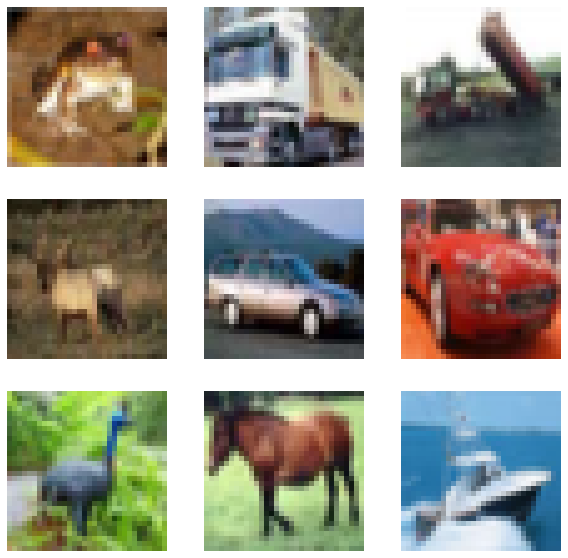

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(train[i])
  plt.axis("off")
i=+1

In [16]:
#Base CAE model 
input = Input(shape=(32, 32,3), name="input")

x = Convolution2D(8, kernel_size=(3,3), padding='same', activation='relu', name= 'conv_1') (input)

x= MaxPooling2D(pool_size=(2,2), padding='same') (x)
x=  Convolution2D(12, kernel_size=(3,3), padding= 'same', activation='relu', name='conv_2') (x)
x= MaxPooling2D(pool_size=(2, 2), padding='same') (x)
x = Convolution2D(16, kernel_size=(3,3), padding='same', activation='relu', name= 'conv_3')(x)
x = UpSampling2D(size=(2, 2)) (x)
x = Convolution2D(12, kernel_size=(3,3), padding='same', activation='relu', name='conv_4') (x)
x= UpSampling2D(size=(2,2)) (x)


output = Convolution2D(filters=3, kernel_size=(3,3), padding='same', activation='relu', name='output')(x)

model= Model(inputs =input, outputs=output, name= 'CAE') 
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "CAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 12)         0         
 2D)                                                             
                                                                 
 conv_3 (Conv2D)             (None, 8, 8, 16)          1744    

In [17]:
history = model.fit(train,train,epochs=10,validation_data=(validation,validation))

Epoch 1/10
1500/1500 [==============================] - 43s 9ms/step - loss: 0.8951 - accuracy: 0.4850 - val_loss: 0.5793 - val_accuracy: 0.5599
Epoch 2/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5767 - accuracy: 0.5969 - val_loss: 0.5772 - val_accuracy: 0.6131
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5746 - accuracy: 0.6132 - val_loss: 0.5705 - val_accuracy: 0.6173
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5723 - accuracy: 0.6208 - val_loss: 0.5702 - val_accuracy: 0.6282
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5704 - accuracy: 0.6303 - val_loss: 0.5684 - val_accuracy: 0.6117
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5715 - accuracy: 0.6265 - val_loss: 0.5675 - val_accuracy: 0.6579
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5766 - accuracy: 0.5727 - val_loss: 0.5766 - val_ac

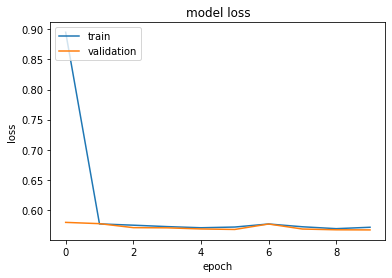

In [18]:
# plot of the loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


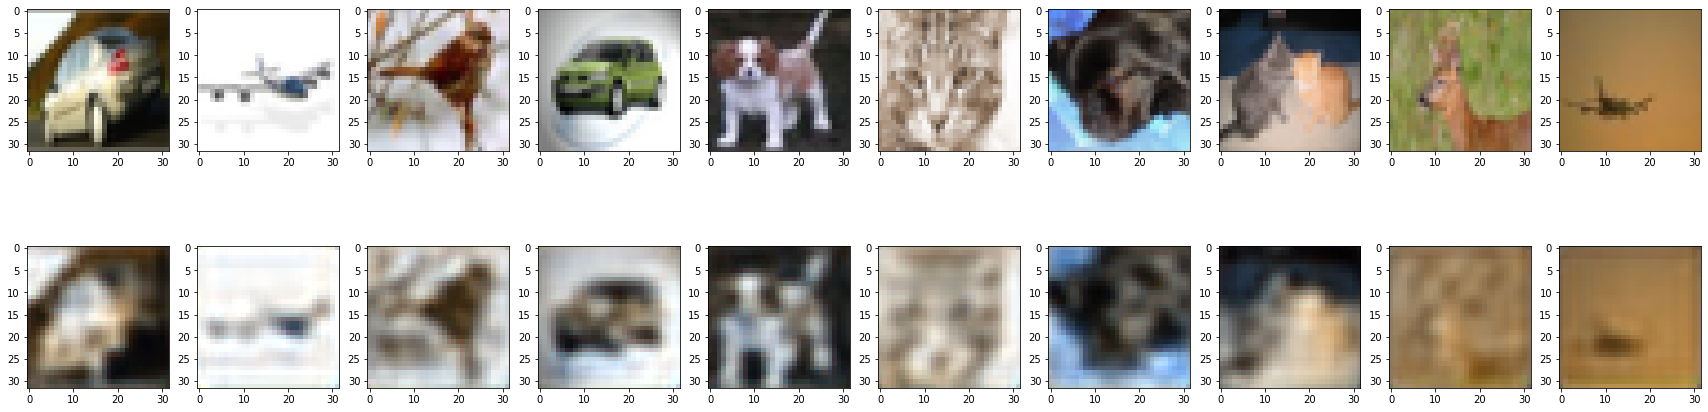

In [19]:
#prediction on test set for the base model
output = model.predict(test)
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(output[i])
plt.show() 

In [20]:
#test error of the base model
test_loss, test_acc = model.evaluate(test, test)

188/188 [==============================] - 1s 5ms/step - loss: 0.5677 - accuracy: 0.6613


In [21]:
#CAE with only 3 intermediate layers 
input = Input(shape=(32, 32,3), name="input")
x = Convolution2D(8, kernel_size=(3,3), padding='same', activation='relu', name= 'conv_1') (input)
x= MaxPooling2D(pool_size=(2,2), padding='same') (x)
x=  Convolution2D(10, kernel_size=(3,3), padding= 'same', activation='relu', name='conv_2') (x)
x = UpSampling2D(size=(2, 2)) (x)
x = Convolution2D(16, kernel_size=(3,3), padding='same', activation='relu', name='conv_3') (x)
output = Convolution2D(filters=3, kernel_size=(3,3), padding='same', activation='relu', name='output')(x)
model1= Model(inputs =input, outputs=output, name= 'CAE') 
model1.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "CAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 10)        730       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 32, 32, 10)       0         
 2D)                                                             
                                                                 
 conv_3 (Conv2D)             (None, 32, 32, 16)        1456    

In [22]:
history1 = model1.fit(train,train,epochs=10, validation_data=(validation,validation))

Epoch 1/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5924 - accuracy: 0.5627 - val_loss: 0.5630 - val_accuracy: 0.6518
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5614 - accuracy: 0.6767 - val_loss: 0.5569 - val_accuracy: 0.7560
Epoch 3/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.5599 - accuracy: 0.7063 - val_loss: 0.5562 - val_accuracy: 0.7503
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.5612 - accuracy: 0.6867 - val_loss: 0.5737 - val_accuracy: 0.3222
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.5593 - accuracy: 0.7170 - val_loss: 0.5555 - val_accuracy: 0.7362
Epoch 6/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5570 - accuracy: 0.7296 - val_loss: 0.5547 - val_accuracy: 0.7855
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.5598 - accuracy: 0.6751 - val_loss: 0.5562 - val_

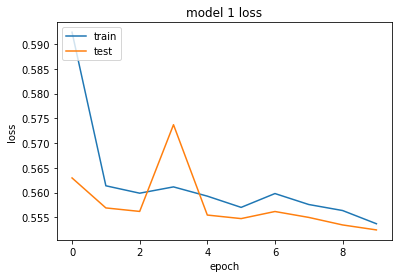

In [23]:
#plot of the loss function
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


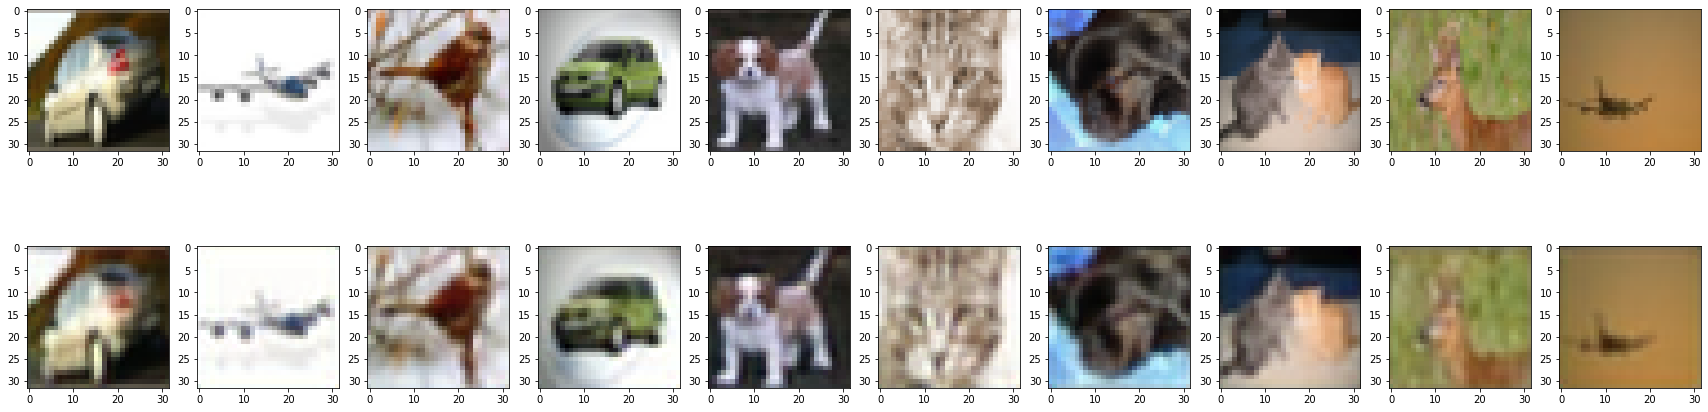

In [24]:
#predictions on test set for CAE with 3 intermediate layers
output1 = model1.predict(test)
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(output1[i])
plt.show() 

In [25]:
#test error of the CAE with 3 intermediate layers
test_loss, test_acc = model1.evaluate(test, test)

188/188 [==============================] - 1s 5ms/step - loss: 0.5533 - accuracy: 0.8127


In [26]:
# CAE different number of channels
input = Input(shape=(32, 32,3), name="input")

x = Convolution2D(4, kernel_size=(3,3), padding='same', activation='relu', name= 'conv_1') (input)

x= MaxPooling2D(pool_size=(2,2), padding='same') (x)
x=  Convolution2D(6, kernel_size=(3,3), padding= 'same', activation='relu', name='conv_2') (x)
x= MaxPooling2D(pool_size=(2, 2), padding='same') (x)
x = Convolution2D(10, kernel_size=(3,3), padding='same', activation='relu', name= 'conv_3')(x)
x = UpSampling2D(size=(2, 2)) (x)
x = Convolution2D(6,kernel_size=(3,3), padding='same', activation='relu', name='conv_4') (x)
x= UpSampling2D(size=(2,2)) (x)


output = Convolution2D(filters=3, kernel_size=(3,3), padding='same', activation='relu', name='output')(x)

model3= Model(inputs =input, outputs=output, name= 'CAE') 
model3.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

model3.summary()

Model: "CAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 4)         112       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 4)        0         
 2D)                                                             
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 6)         222       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 6)          0         
 2D)                                                             
                                                                 
 conv_3 (Conv2D)             (None, 8, 8, 10)          550     

In [27]:
history3 = model3.fit(train,train,epochs=10,  validation_data=(validation,validation))

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.6202 - accuracy: 0.3426 - val_loss: 0.5869 - val_accuracy: 0.3691
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5866 - accuracy: 0.4032 - val_loss: 0.5861 - val_accuracy: 0.4524
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5818 - accuracy: 0.5430 - val_loss: 0.5759 - val_accuracy: 0.6002
Epoch 4/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.5762 - accuracy: 0.6078 - val_loss: 0.5774 - val_accuracy: 0.5298
Epoch 5/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.5821 - accuracy: 0.5917 - val_loss: 0.5740 - val_accuracy: 0.6357
Epoch 6/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.5825 - accuracy: 0.5433 - val_loss: 0.5754 - val_accuracy: 0.6217
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5755 - accuracy: 0.6152 - val_loss: 0.5730 - val_ac

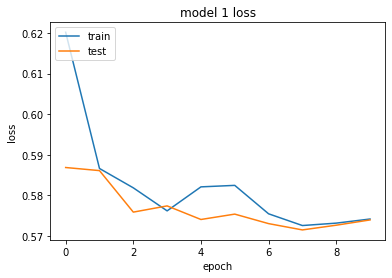

In [28]:
# summarize history for loss of CAE with different numbers of channels
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


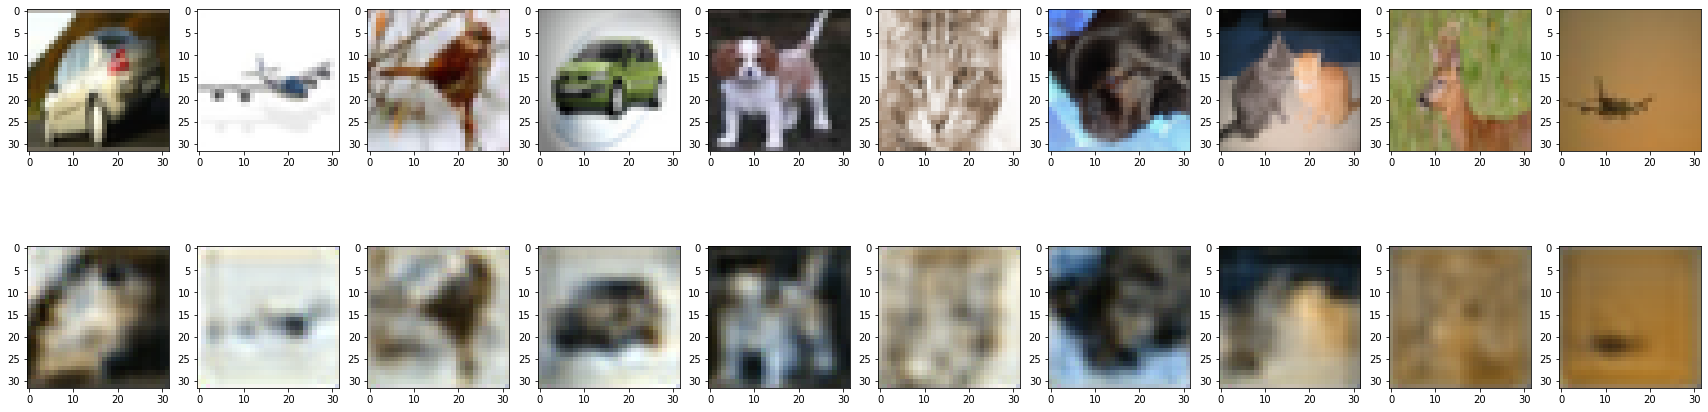

In [29]:
#predictions on test set for CAE with different numbers of channels
output3 = model3.predict(test)
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(output3[i])
plt.show()

In [30]:
#test error of CAE with different numbers of channels
test_loss, test_acc = model3.evaluate(test, test)

188/188 [==============================] - 1s 5ms/step - loss: 0.5749 - accuracy: 0.6227


In [31]:
#model function to apply different filter sizes
def def_mod(rgb,filter,pad):
  input = Input(shape=(32, 32,rgb), name="input")

  x = Convolution2D(8, kernel_size=filter, padding=pad, activation='relu', name= 'conv_1') (input)
  x= MaxPooling2D(pool_size=(2,2), padding=pad) (x)
  x=  Convolution2D(12, kernel_size=filter, padding=pad, activation='relu', name='conv_2') (x)
  x= MaxPooling2D(pool_size=(2, 2), padding=pad) (x)
  x = Convolution2D(16, kernel_size=filter, padding=pad, activation='relu', name= 'conv_3')(x)
  x = UpSampling2D(size=(2, 2)) (x)
  x = Convolution2D(12, kernel_size=filter, padding=pad, activation='relu', name='conv_4') (x)
  x= UpSampling2D(size=(2,2)) (x)

  output = Convolution2D(3, kernel_size=filter, padding=pad, activation='relu', name='output')(x)

  model= Model(inputs =input, outputs=output, name= 'CAE') 
  model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [32]:
#CAE with 1 filter
model_f1=def_mod(rgb=3,filter=(1,1),pad='same')
model_f1.summary()

Model: "CAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 8)         32        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 12)        108       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 12)         0         
 2D)                                                             
                                                                 
 conv_3 (Conv2D)             (None, 8, 8, 16)          208     

In [33]:
history_f1=model_f1.fit(train,train,epochs=10,validation_data=(validation,validation))

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.6104 - accuracy: 0.5875 - val_loss: 0.5816 - val_accuracy: 0.6689
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5801 - accuracy: 0.6668 - val_loss: 0.5792 - val_accuracy: 0.7029
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5780 - accuracy: 0.7550 - val_loss: 0.5774 - val_accuracy: 0.7865
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5781 - accuracy: 0.7800 - val_loss: 0.5771 - val_accuracy: 0.8010
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5774 - accuracy: 0.7885 - val_loss: 0.5768 - val_accuracy: 0.8201
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5777 - accuracy: 0.7864 - val_loss: 0.5767 - val_accuracy: 0.8045
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5766 - accuracy: 0.8098 - val_loss: 0.5829 - val_ac

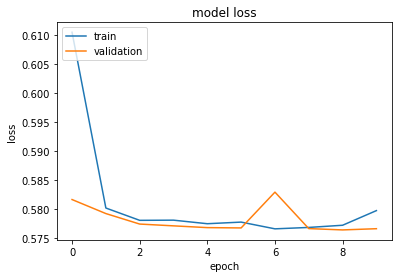

In [34]:
# the plot of loss function
plt.plot(history_f1.history['loss'])
plt.plot(history_f1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


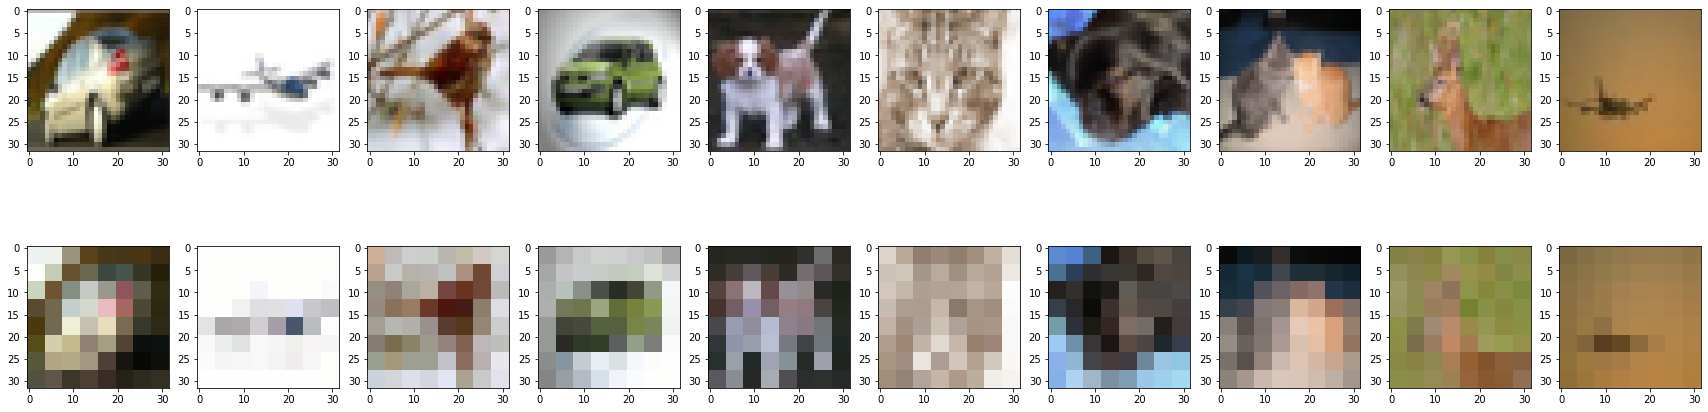

In [35]:
#predictions on test set for CAE with 1 filter
output_f1 =model_f1.predict(test)
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(output_f1[i])
plt.show()

In [36]:
#test error of CAE  with 1 filter
test_loss, test_acc = model_f1.evaluate(test, test)

188/188 [==============================] - 1s 5ms/step - loss: 0.5774 - accuracy: 0.8365


In [37]:
#CAE  with 5 filters
model_f5=def_mod(rgb=3,filter=(5,5),pad='same')
model_f5.summary()

Model: "CAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 8)         608       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 12)        2412      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 12)         0         
 2D)                                                             
                                                                 
 conv_3 (Conv2D)             (None, 8, 8, 16)          4816    

In [38]:
history_f5=model_f5.fit(train,train,epochs=10,validation_data=(validation,validation))

Epoch 1/10
1500/1500 [==============================] - 15s 9ms/step - loss: 0.6195 - accuracy: 0.4514 - val_loss: 0.6041 - val_accuracy: 0.3901
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.5872 - accuracy: 0.4393 - val_loss: 0.5789 - val_accuracy: 0.5612
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5941 - accuracy: 0.4623 - val_loss: 0.5856 - val_accuracy: 0.4769
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5854 - accuracy: 0.4362 - val_loss: 0.5801 - val_accuracy: 0.4777
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5813 - accuracy: 0.5424 - val_loss: 0.5739 - val_accuracy: 0.5892
Epoch 6/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.5843 - accuracy: 0.5150 - val_loss: 0.5766 - val_accuracy: 0.6249
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5763 - accuracy: 0.6004 - val_loss: 0.5723 - val_a

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


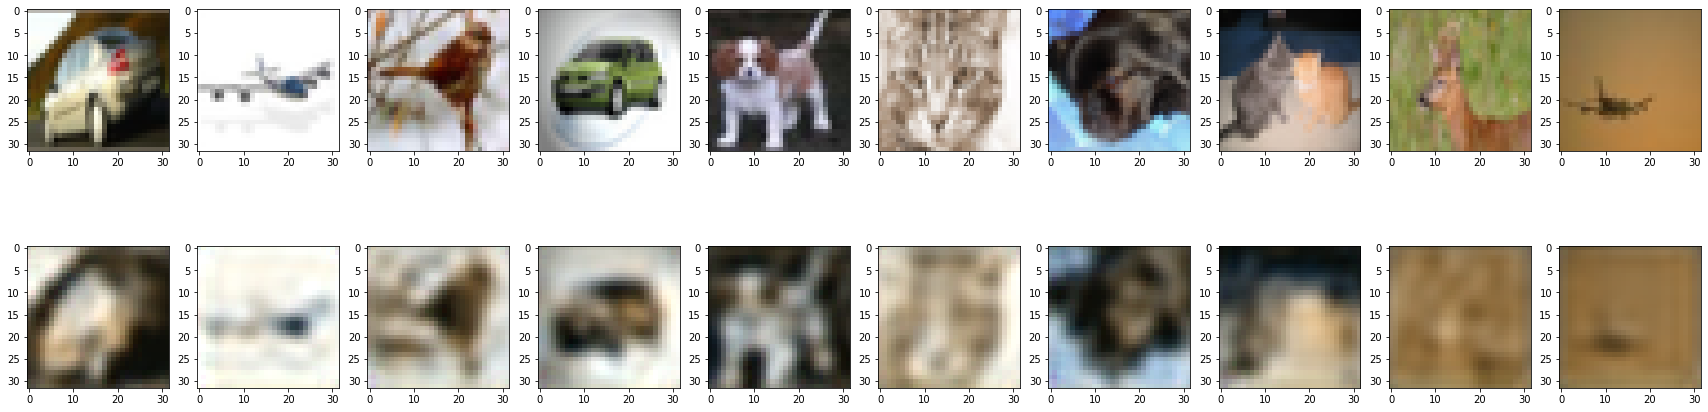

In [39]:
#predictions on test set for CAE  with 5 filter
output_f5 =model_f5.predict(test)
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(output_f5[i])
plt.show()

In [40]:
#test error of CAE  with 5 filter
test_loss, test_acc = model_f5.evaluate(test, test)

188/188 [==============================] - 1s 6ms/step - loss: 0.5722 - accuracy: 0.6334


In [41]:
#CAE with 7 filter
model_f7=def_mod(rgb=3,filter=(7,7),pad='same')

In [42]:
history_f7=model_f7.fit(train,train,epochs=10,validation_data=(validation,validation))

Epoch 1/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.6198 - accuracy: 0.3892 - val_loss: 0.5871 - val_accuracy: 0.4551
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.5995 - accuracy: 0.4181 - val_loss: 0.5880 - val_accuracy: 0.3880
Epoch 3/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.5900 - accuracy: 0.4273 - val_loss: 0.5846 - val_accuracy: 0.4396
Epoch 4/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.6007 - accuracy: 0.4204 - val_loss: 0.5865 - val_accuracy: 0.4748
Epoch 5/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.5929 - accuracy: 0.4967 - val_loss: 0.5976 - val_accuracy: 0.4456
Epoch 6/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.5956 - accuracy: 0.4356 - val_loss: 0.5877 - val_accuracy: 0.4852
Epoch 7/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.5892 - accuracy: 0.4375 - val_loss: 0.5852 -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


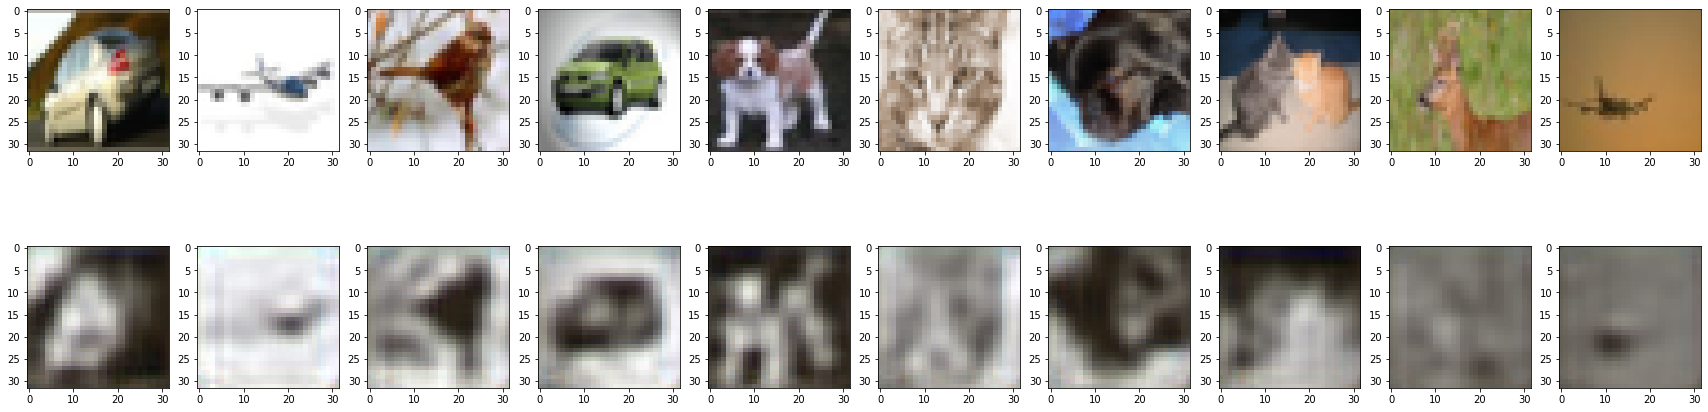

In [43]:
#predictions on test set for CAE  with 7 filter
output_f7 =model_f7.predict(test)
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(output_f7[i])
plt.show()

In [44]:
#test error of CAE with 7 filter
test_loss, test_acc = model_f7.evaluate(test, test)

188/188 [==============================] - 1s 7ms/step - loss: 0.5859 - accuracy: 0.4710


In [48]:

#colorisation
# rgb is divided to luminance and chrominance parts
X =[]
Y =[]
for img in train:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)

(48000, 32, 32, 1)
(48000, 32, 32, 2)


In [49]:
Xv =[]
Yv =[]
for img in validation:
  try:
      lab = rgb2lab(img)
      Xv.append(lab[:,:,0]) 
      Yv.append(lab[:,:,1:] / 128)
  except:
     print('error')
Xv = np.array(Xv)
Yv = np.array(Yv)
Xv = Xv.reshape(Xv.shape+(1,))

In [51]:
from keras.models import Sequential
modelr = Sequential()
modelr.add(Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
modelr.add(MaxPooling2D(pool_size=(2,2), padding='same') )
modelr.add(Conv2D(12, (3, 3), activation='relu', padding='same'))
modelr.add(MaxPooling2D(pool_size=(2,2), padding='same') )
modelr.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
modelr.add(UpSampling2D((2, 2)))
modelr.add(Conv2D(12, (3,3), activation='relu', padding='same'))
modelr.add(UpSampling2D((2, 2)))
modelr.add(Conv2D(2, (3,3), activation='relu', padding='same'))

modelr.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
modelr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         80        
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 12)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          1744      
                                                                 
 up_sampling2d_11 (UpSamplin  (None, 16, 16, 16)       0

In [52]:
history_r = modelr.fit(X,Y, epochs=10,validation_data=(Xv,Yv)) 

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0125 - accuracy: 0.3717 - val_loss: 0.0120 - val_accuracy: 0.3749
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0120 - accuracy: 0.3711 - val_loss: 0.0120 - val_accuracy: 0.3749
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0120 - accuracy: 0.3711 - val_loss: 0.0120 - val_accuracy: 0.3749
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0120 - accuracy: 0.3711 - val_loss: 0.0120 - val_accuracy: 0.3749
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0120 - accuracy: 0.3711 - val_loss: 0.0120 - val_accuracy: 0.3749
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0120 - accuracy: 0.3711 - val_loss: 0.0120 - val_accuracy: 0.3749
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0120 - accuracy: 0.3711 - val_loss: 0.0120 - val_ac

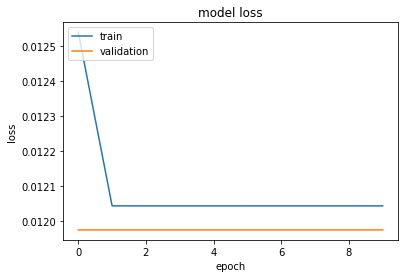

In [53]:
# the plot of loss function
plt.plot(history_r.history['loss'])
plt.plot(history_r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [54]:
test_col = []
for i in test:
  lab = rgb2lab(i)
  test_col.append(lab[:,:,0])

test_col = np.array(test_col)

test_col = test_col.reshape(test_col.shape+(1,)) 

In [56]:
output = modelr.predict(test_col)
output = output*128

In [58]:
recolor_test = []
for i in range(0, 10):
  result = np.zeros((32,32,3))
  result[:,:,0] = test_col[i][:,:,0]
  result[:,:,1:] = output[i]
  recolor_test.append(lab2rgb(result))

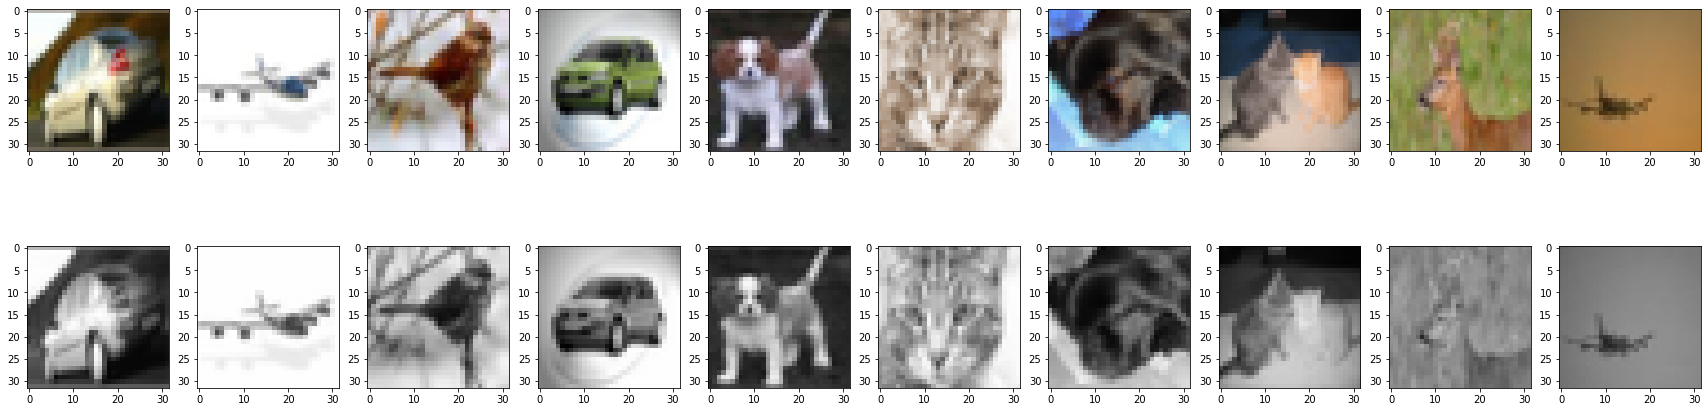

In [59]:
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(recolor_test[i])
plt.show()

The first row has the original colour images. The second shows the slightly colorised greyscale images. This CAE model uses relu activation all the  layers.

In [61]:
#colorisation using tanh activation

from keras.models import Sequential
modelt = Sequential()
modelt.add(Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
modelt.add(MaxPooling2D(pool_size=(2,2), padding='same') )
modelt.add(Conv2D(12, (3, 3), activation='relu', padding='same'))
modelt.add(MaxPooling2D(pool_size=(2,2), padding='same') )
modelt.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
modelt.add(UpSampling2D((2, 2)))
modelt.add(Conv2D(12, (3,3), activation='relu', padding='same'))
modelt.add(UpSampling2D((2, 2)))
modelt.add(Conv2D(2, (3,3), activation='tanh', padding='same'))

modelt.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
modelt.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 8)         80        
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 12)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          1744      
                                                                 
 up_sampling2d_13 (UpSamplin  (None, 16, 16, 16)      

In [62]:
history_t = modelt.fit(X,Y, epochs=10,validation_data=(Xv,Yv)) 

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0186 - accuracy: 0.6227 - val_loss: 0.0110 - val_accuracy: 0.6251
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0110 - accuracy: 0.6289 - val_loss: 0.0110 - val_accuracy: 0.6251
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0110 - accuracy: 0.6289 - val_loss: 0.0110 - val_accuracy: 0.6251
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0110 - accuracy: 0.6289 - val_loss: 0.0110 - val_accuracy: 0.6251
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0110 - accuracy: 0.6289 - val_loss: 0.0110 - val_accuracy: 0.6251
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0110 - accuracy: 0.6289 - val_loss: 0.0110 - val_accuracy: 0.6251
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0110 - accuracy: 0.6289 - val_loss: 0.0110 - val_ac

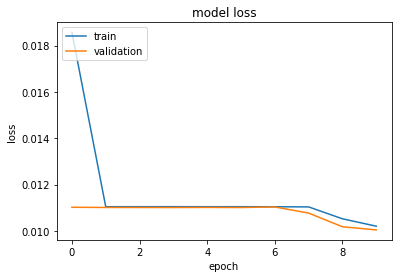

In [63]:
# the plot of loss function
plt.plot(history_t.history['loss'])
plt.plot(history_t.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [64]:
test_colt = []
for i in test:
  lab = rgb2lab(i)
  test_colt.append(lab[:,:,0])

test_colt = np.array(test_colt)

test_colt = test_colt.reshape(test_colt.shape+(1,)) 

In [65]:
outputt = modelt.predict(test_colt)
outputt = outputt*128

In [66]:
recolor_test = []
for i in range(0, 10):
  result = np.zeros((32,32,3))
  result[:,:,0] = test_colt[i][:,:,0]
  result[:,:,1:] = output[i]
  recolor_test.append(lab2rgb(result))

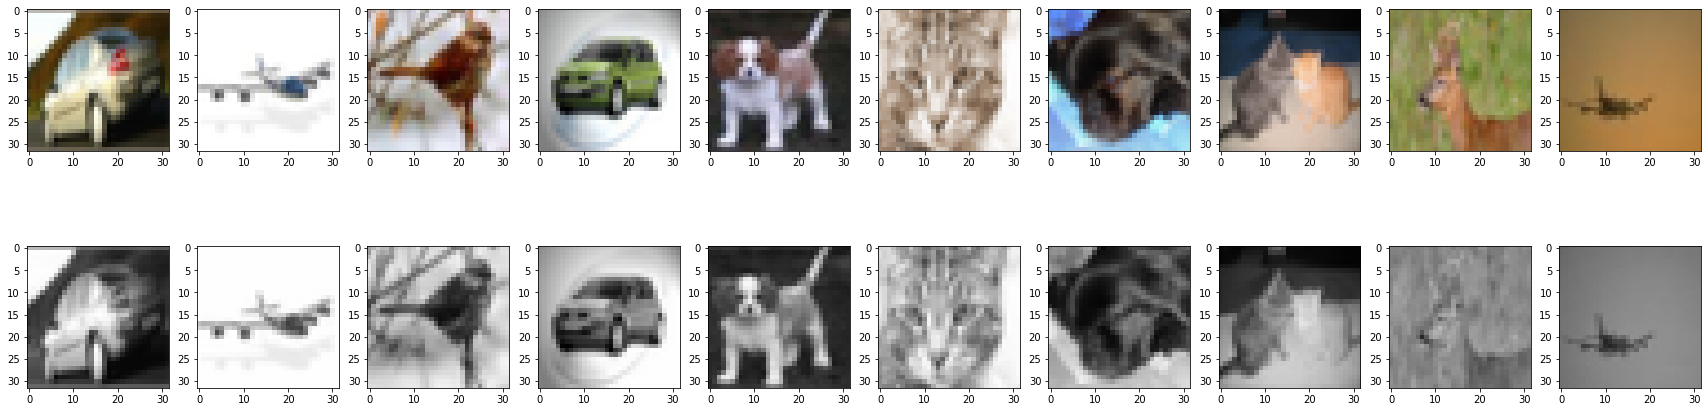

In [67]:
n = 10 
plt.figure(figsize=(30, 8))
for i in range(n):
  ax= plt.subplot (2, n, i + 1)
  plt.imshow(test[i])
  ax = plt.subplot (2, n, i + 1 + n)
  plt.imshow(recolor_test[i])
plt.show()

The first row has the original colour images. The second shows the slightly colorised greyscale images. This CAE model uses relu activation all the layers and tanh for the last layer.